In [3]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


In [5]:
from chart_studio import plotly

In [6]:
import plotly.offline as pyoff
import plotly.graph_objs as go

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv(r'US_Accidents_March23.csv.zip')

In [9]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     7728394 non-null  object 
 1   Source                 7728394 non-null  object 
 2   Severity               7728394 non-null  int64  
 3   Start_Time             7728394 non-null  object 
 4   End_Time               7728394 non-null  object 
 5   Start_Lat              7728394 non-null  float64
 6   Start_Lng              7728394 non-null  float64
 7   End_Lat                4325632 non-null  float64
 8   End_Lng                4325632 non-null  float64
 9   Distance(mi)           7728394 non-null  float64
 10  Description            7728389 non-null  object 
 11  Street                 7717525 non-null  object 
 12  City                   7728141 non-null  object 
 13  County                 7728394 non-null  object 
 14  State             

In [11]:
df.drop(columns = ['Source','End_Lat','End_Lng','Description','Timezone','Airport_Code','Pressure(in)','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'],inplace = True)

In [12]:
dfstate = df.groupby('State').count()['ID'].reset_index()

In [13]:
dfstate

,State,ID
0,AL,101044
1,AR,22780
2,AZ,170609
3,CA,1741433
4,CO,90885
5,CT,71005
6,DC,18630
7,DE,14097
8,FL,880192
9,GA,169234


In [14]:
data = [dict(type='choropleth',autocolorscale=False, locations = dfstate['State'],z=dfstate['ID'],locationmode='USA-states',text = dfstate['ID'], colorscale = 'turbo', colorbar = dict(title='Car Accidents'))]

In [15]:
layout = dict(title='Car Accidents', geo = dict(scope='usa',projection = dict(type ='albers usa'),showlakes =True,lakecolor='rgb(66,165,245)'))

In [16]:
pyoff.plot({"data": data,"layout": layout})

'temp-plot.html'

In [17]:
dfscat = df.copy()

In [18]:
dfscat.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Street,City,County,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,I-70 E,Dayton,Montgomery,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Brice Rd,Reynoldsburg,Franklin,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,State Route 32,Williamsburg,Clermont,...,False,False,False,False,False,False,False,True,False,Night
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,I-75 S,Dayton,Montgomery,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Miamisburg Centerville Rd,Dayton,Montgomery,...,False,False,False,False,False,False,False,True,False,Day


In [23]:
data1 = [dict(type='scattergeo',lat = dfscat['Start_Lat'],lon = dfscat['Start_Lng'],
             marker = dict(size = 9, autocolorscale=False,colorscale = 'Viridis',
            color = dfscat['Severity'], colorbar = dict(title='Severity')))]


layout1 = dict(title='Car Accidents Location',
              geo = dict(scope='usa',projection = dict(type ='albers usa'),showland = True,
                    landcolor="rgb(250,250,250)",subunitcolor = "rgb(217,217,217)",
                     countrycolor = "rgb(217,217,217)",countrywidth =0.5, subunitwidth=0.1))

In [24]:
pyoff.plot({
    "data": data1,
    "layout": layout1
})

'temp-plot.html'

In [56]:
dfstate['percent'] = (dfstate['ID']/dfstate['ID'].sum()).round(4)*100

In [58]:
dfstate.sort_values('ID',ascending = False)

,State,ID,percent
3,CA,1741433,22.53
8,FL,880192,11.39
41,TX,582837,7.54
38,SC,382557,4.95
32,NY,347960,4.50
25,NC,338199,4.38
43,VA,303301,3.92
36,PA,296620,3.84
21,MN,192084,2.49
35,OR,179660,2.32


In [34]:
dftop10 = dfstate.sort_values('ID',ascending = False).head(10)

In [40]:
dftop10

,State,ID
3,CA,1741433
8,FL,880192
41,TX,582837
38,SC,382557
32,NY,347960
25,NC,338199
43,VA,303301
36,PA,296620
21,MN,192084
35,OR,179660


C:\Users\USER\AppData\Local\Temp\ipykernel_20384\4025856255.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


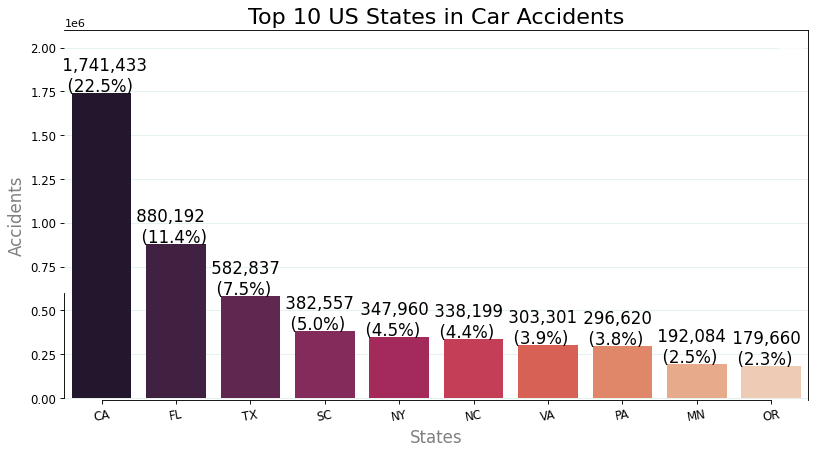

In [63]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=dftop10['ID'], x=dftop10['State'], palette='rocket')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')

ax.set(ylim =(-10000, 2100000))

plt.title('Top 10 US States in Car Accidents', size=20, color="black")
ax.set_xlabel('States', fontsize=15, color='grey')
ax.set_ylabel('Accidents', fontsize=15, color='grey')
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 600000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

ax.legend( prop={'size': 10.5}, loc='best', borderpad=1, edgecolor='white');

In [73]:
df2 = df.groupby(['State','City']).count().sort_values(by = ['State','ID'],ascending = False)['ID']

In [75]:
df2 = df2.reset_index()

In [79]:
df2 = df2.groupby('State').first()

In [80]:
dftot = pd.merge(dfstate,df2, on = 'State')

In [86]:
dftot = dftot.sort_values('ID_x',ascending = False).head(10)

In [89]:
dftot

,State,ID_x,percent,City,ID_y
3,CA,1741433,22.53,Los Angeles,156491
8,FL,880192,11.39,Miami,186768
41,TX,582837,7.54,Houston,169428
38,SC,382557,4.95,Greenville,35694
32,NY,347960,4.50,Bronx,27297
25,NC,338199,4.38,Charlotte,138345
43,VA,303301,3.92,Richmond,41954
36,PA,296620,3.84,Philadelphia,20384
21,MN,192084,2.49,Minneapolis,51488
35,OR,179660,2.32,Portland,34754


C:\Users\USER\AppData\Local\Temp\ipykernel_20384\2365404491.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


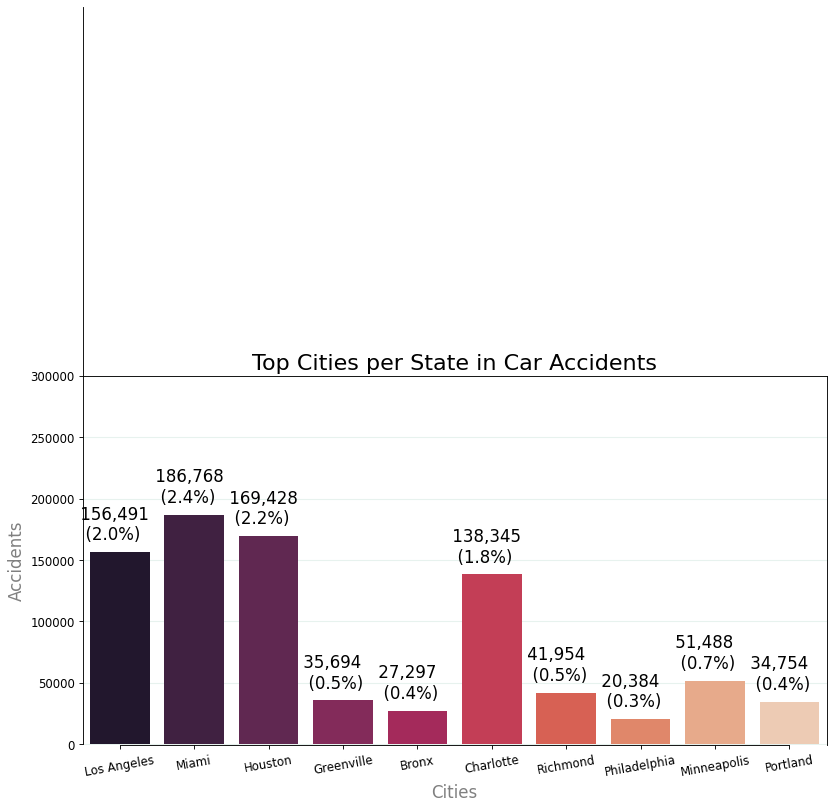

In [93]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=dftot['ID_y'], x=dftot['City'], palette='rocket')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')

ax.set(ylim =(-1000, 300000))

plt.title('Top Cities per State in Car Accidents', size=20, color="black")
ax.set_xlabel('Cities', fontsize=15, color='grey')
ax.set_ylabel('Accidents', fontsize=15, color='grey')
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 600000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

ax.legend( prop={'size': 10.5}, loc='best', borderpad=1, edgecolor='white');

In [95]:
dfstreet = df.groupby('Street').count()['ID'].sort_values(ascending = False).head(10)

In [129]:
dfstreet = dfstreet.reset_index()

In [130]:
dfstreet

,Street,ID
0,I-95 N,78430
1,I-95 S,74528
2,I-5 N,71968
3,I-10 E,55572
4,I-10 W,53725
5,I-5 S,51781
6,I-80 W,39662
7,I-80 E,36113
8,I-405 N,32364
9,I-75 N,28166


C:\Users\USER\AppData\Local\Temp\ipykernel_20384\3965260058.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


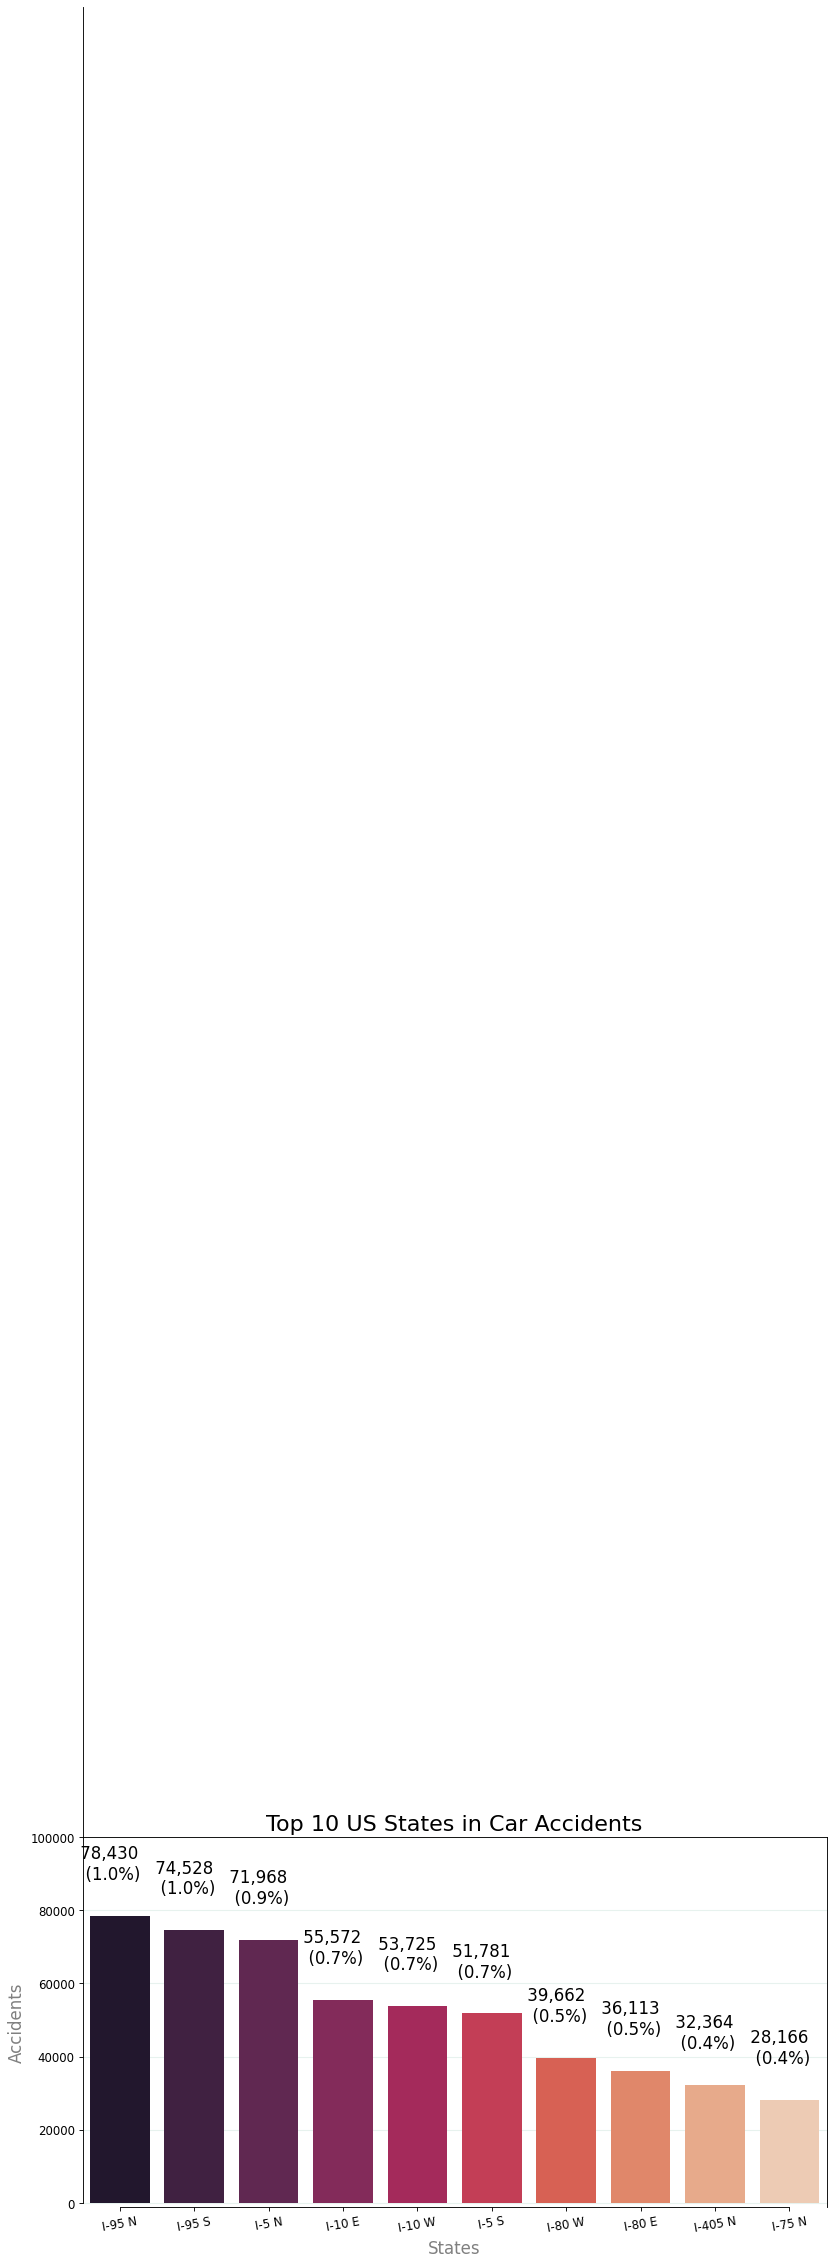

In [141]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=dfstreet['ID'], x=dfstreet['Street'], palette='rocket')

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')

ax.set(ylim =(-1000, 100000))

plt.title('Top 10 US States in Car Accidents', size=20, color="black")
ax.set_xlabel('States', fontsize=15, color='grey')
ax.set_ylabel('Accidents', fontsize=15, color='grey')
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 600000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

ax.legend( prop={'size': 10.5}, loc='best', borderpad=1, edgecolor='white');

<AxesSubplot: xlabel='Street'>

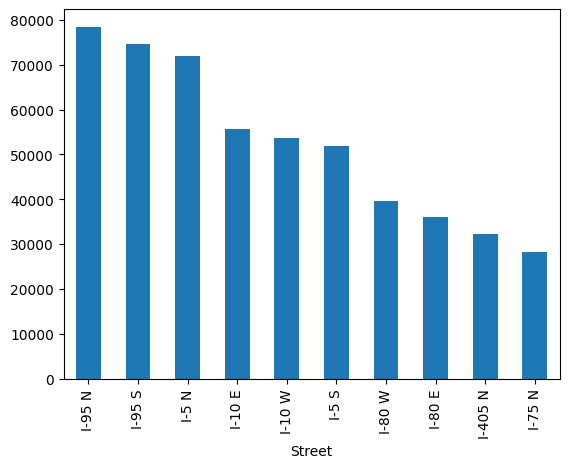

In [99]:
dfstreet.plot(kind = 'bar',rot = )

In [102]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [103]:
df['Year'] = df['Start_Time'].dt.year

In [120]:
lst = list(dftot['State'])

In [121]:
lst

['CA', 'FL', 'TX', 'SC', 'NY', 'NC', 'VA', 'PA', 'MN', 'OR']

In [124]:
dfnew = df[df['State'].isin(lst)].groupby(['State','Year']).agg({'ID':'count'})

In [125]:
dfnew

ID
State Year        
CA    2016  140452
      2017  152748
      2018  156898
      2019  213455
      2020  285532
...            ...
VA    2019   25714
      2020   44803
      2021   67768
      2022   99311
      2023   11426

[80 rows x 1 columns]

In [136]:
table = pd.pivot_table(dfnew, values='ID', index=['State'],
                       columns=['Year'], aggfunc="sum")

KeyError: "[('2023', '')] not found in axis"

In [137]:
table.columns

Int64Index([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int64', name='Year')

In [139]:
table.drop((2023),axis = 1,inplace = True)
table

Year,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,
CA,140452,152748,156898,213455,285532,341876,375913
FL,37060,60706,65781,60313,130362,240608,263119
MN,2567,10434,20227,29607,39193,42753,38354
NC,6147,34108,56262,45999,48633,65750,72167
NY,20097,36986,38050,42967,48805,55470,94765
OR,1026,6175,22520,41198,34452,38231,30127
PA,21232,26905,22230,20100,43189,71520,80839
SC,3015,28333,56358,58997,62789,79651,84880
TX,49769,85588,84111,78718,73488,101830,95509


<AxesSubplot: xlabel='Year', ylabel='State'>

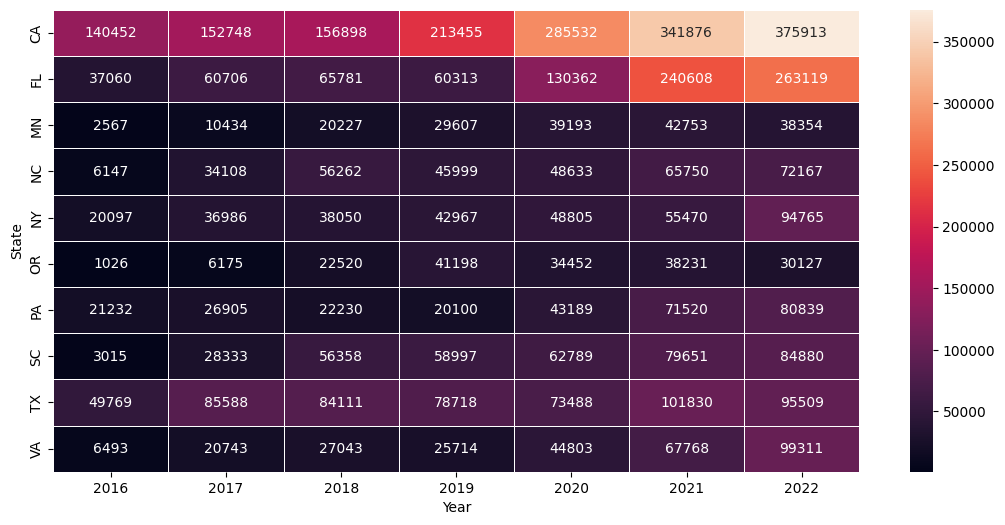

In [140]:
f, ax = plt.subplots(figsize=(13,6))
sns.heatmap(table, annot=True, fmt='d', linewidth=.5, ax=ax)

In [148]:
dftot

,State,ID_x,percent,City,ID_y
3,CA,1741433,22.53,Los Angeles,156491
8,FL,880192,11.39,Miami,186768
41,TX,582837,7.54,Houston,169428
38,SC,382557,4.95,Greenville,35694
32,NY,347960,4.50,Bronx,27297
25,NC,338199,4.38,Charlotte,138345
43,VA,303301,3.92,Richmond,41954
36,PA,296620,3.84,Philadelphia,20384
21,MN,192084,2.49,Minneapolis,51488
35,OR,179660,2.32,Portland,34754


In [146]:
dfpop = pd.read_csv('pop.csv')

In [147]:
dfpop

,California;,;39.029.342
0,Texas;,;30.029.572
1,Florida;,;22.244.823
2,New York;,;19.677.151
3,Pennsylvania;,;12.972.008
4,Illinois;,;12.582.032
5,Ohio;,;11.756.058
6,Georgia;,;10.912.876
7,North Carolina;,;10.698.973
8,Michigan;,;10.034.113
9,New Jersey;,;9.261.699
